In [299]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

In [300]:
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [301]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [302]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [303]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [312]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 15000

In [313]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [314]:
# Define the goal
goal = opt.minimize(loss)

In [315]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [316]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [317]:
game_Data = np.load('cartpoleTraining200.npy')

In [318]:
train_X = np.stack(game_Data[:, 0])
train_y = np.stack(game_Data[:, 1])

In [319]:
train_y[1]

array([0])

In [320]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    #batch_index = np.random.choice(len(train_X), size=batch_size)
    #batch_train_X = train_X[batch_index]
    #batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: train_X, target: train_y})
    temp_loss = sess.run(loss, feed_dict={data: train_X, target: train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y)})
    #temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y)})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    #test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 10000 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))

epoch: 10000 loss: 0.671437 train_acc: 0.623604


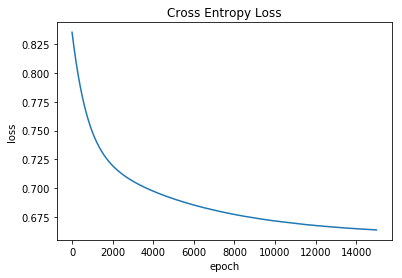

In [321]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [325]:
initial_games = 10

In [338]:
def checkPred():
    all_score = []
    action = random.randrange(2)
    env = gym.make('CartPole-v0')
    env._max_episode_steps = 5000
    for _ in range(initial_games):
        score = 0
        env.reset()
        for _ in range(10000):
            observation, reward, done, info = env.step(action)
            action = prediction.eval(feed_dict={data: np.array(observation).reshape(1,4)}, session=sess)
            action = int(action[0][0])
            score += reward
            env.render()
            if done:
                break
        all_score.append(score)
    print(all_score)
    print('Mean : ' + str(np.mean(np.array(all_score))))
    env.close()

In [341]:
checkPred()

c:\work\ml\openai\gym-master\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[2574.0, 2341.0, 1978.0, 611.0, 1450.0, 2776.0, 2869.0, 5000.0, 715.0, 1848.0]
Mean : 2216.2
